In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load the trained model
loaded_model = joblib.load('trained_rf_model.joblib')

In [5]:
#loading the test data
df_test = pd.read_csv("your_file_name.csv") ## enter name/path of the test file

df_test = df_test.rename(columns={'y': 'subscribed'})

df_test['subscribed'] = [0 if x == 'no' else 1 for x in df_test['subscribed']]

df_input_test = df_test.iloc[:,:-1]
df_output_test = df_test.iloc[:,-1]

df_input_test = pd.get_dummies(df_input_test, dtype=int)

X_test = df_input_test
y_test = df_output_test

Accuracy: 0.8755

Confusion Matrix:
 [[1584  140]
 [ 109  167]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1724
           1       0.54      0.61      0.57       276

    accuracy                           0.88      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.88      0.88      0.88      2000



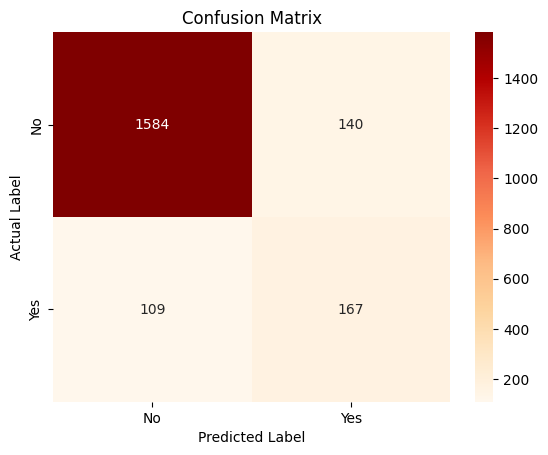

In [6]:
y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

class_label = ["No", "Yes"]
df_cm = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True,  fmt = "d",cmap='OrRd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()